# Making Business Decisions Based on Data

## Project description
We are a big online store. The Covid pandemic has greatly increased the number of people that regularly make their purchases online, but it has also increased the already tough competition between online stores.<br>
In this situation the marketing and the IT department compiled a list of hypotheses that might help to boost the revenue and let us stay afloat of the competition.
<br>
As the company's data analyst, I have to prioritize these hypotheses, launch an A/B test, and analyze the results. 

## Opening and investigating the data

In [1]:
#making sure I and the reviewer have the same versions
!pip install -U pandas --user
!pip install -U matplotlib --user
!pip install -U numpy --user
!pip install -U seaborn --user
!pip install -U joypy --user
!pip install -U scipy --user


     |████████████████████████████████| 11.3 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 11.2 MB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 890 kB 38.3 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
     |████████████████████████████████| 15.7 MB 2.7 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
     |████████████████████████████████| 292 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 38.1 MB 61 kB/s  eta 0:00:01    |████▍                           | 5.3 MB 1.2 MB/s eta 0:00:27
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the defa

In [2]:
#import warnings
#warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
#import matplotlib.patches as patches
#from matplotlib.lines import Line2D
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
#import joypy
from scipy import stats as st

In [4]:
my_date_parser = lambda x: datetime.strptime(x, "%Y-%m-%d")

In [5]:
try:
    # If we are online on the Jupyter Hub, we open the online database
    hypotheses_data = pd.read_csv(
        '/datasets/hypotheses_us.csv',
        sep=';'
    )
    orders_data = pd.read_csv(
        '/datasets/orders_us.csv',
        sep=',',
        dtype={'group': 'category'},
        parse_dates=['date'],
        date_parser=my_date_parser
    )
    visits_data = pd.read_csv(
        '/datasets/visits_us.csv',
        dtype={'group': 'category'},
        parse_dates=['date'],
        date_parser=my_date_parser,
        sep=',')
except:
    # If we are locally we open the local database
    hypotheses_data = pd.read_csv('datasets/hypotheses_us.csv',sep=';')
    orders_data = pd.read_csv('datasets/orders_us.csv',sep=',',
        dtype={'group': 'category'},
        parse_dates=['date'],
        date_parser=my_date_parser
    )
    visits_data = pd.read_csv('datasets/visits_us.csv',sep=',',
        dtype={'group': 'category'},
        parse_dates=['date'],
        date_parser=my_date_parser
    )

In [6]:
orders_data.group=orders_data.group.cat.as_ordered()
visits_data.group=visits_data.group.cat.as_ordered()

In [7]:
def investigate_data(data):
    print(data.head())
    print(data.info())
    print('The shape is:',data.shape)
    print(data.describe())
    #print(data.describe(include=['object']))

In [8]:
investigate_data(hypotheses_data)

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ 

In [9]:
investigate_data(orders_data)

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     30.4     B
1     2804400009  3642806036 2019-08-15     15.2     B
2     2961555356  4069496402 2019-08-15     10.2     A
3     3797467345  1196621759 2019-08-15    155.1     B
4     2282983706  2322279887 2019-08-15     40.5     B
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 38.8 KB
None
The shape is: (1197, 5)
       transactionId     visitorId       revenue
count   1.197000e+03  1.197000e+03   1197.0000

In [10]:
investigate_data(visits_data)

        date group  visits
0 2019-08-01     A     719
1 2019-08-02     A     619
2 2019-08-03     A     507
3 2019-08-04     A     717
4 2019-08-05     A     756
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     category      
 2   visits  62 non-null     int64         
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 1.2 KB
None
The shape is: (62, 3)
           visits
count   62.000000
mean   607.290323
std    114.400560
min    361.000000
25%    534.000000
50%    624.500000
75%    710.500000
max    770.000000


Let's check now for duplicate rows in our tables. Duplicate data could skew our analysis towards one of the sides. We are going to print the duplicate rows (if no rows are printed, we have no duplicates)

In [11]:
orders_data[orders_data.duplicated()]

,transactionId,visitorId,date,revenue,group


In [12]:
visits_data[visits_data.duplicated()]

,date,group,visits


So we do not have duplicated rows.

Let's check if we have users that are both in groups $A$ and $B$. We are going to make a dataframe with only the membership of each group.

In [13]:
membershipA=orders_data[orders_data['group']=='A']['visitorId']
membershipB=orders_data[orders_data['group']=='B']['visitorId']
membershipA.drop_duplicates(inplace=True)
membershipB.drop_duplicates(inplace=True)

/home/jovyan/.local/lib/python3.7/site-packages/pandas/core/series.py:2136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


Now we have in `membershipA` and `membershipB` the list of clients in groups $A$ and $B$ without doubles. Let's check if we have clients that are in both groups.

In [14]:
membershipAB=membershipA.append(membershipB)
print('We have {} clients who are in both groups.'.format(membershipAB[ membershipAB.duplicated()].count()))

We have 58 clients who are in both groups.


Good think we checked, having clients in both groups defeats the whole purpose of the A/B test. We want to see the effect of the specific set of changes we made on the user, and if the user is influenced by both sets of changes, his actions become inconclusive and polute the data of our test. We have to remove these users from both groups.

We need to remove these double users both from the `visits_data` and from `orders_data`. To remove it from visits_data, we need to find out how many transcations these users made each day and remove this number from the number of visits.

In [15]:
double_membership=membershipAB[ membershipAB.duplicated()]
orders_data[orders_data['visitorId'].isin(double_membership)].head()

,transactionId,visitorId,date,revenue,group
2,2961555356,4069496402,2019-08-15,10.2,A
20,2904772834,963407295,2019-08-15,5.6,B
23,4252514150,351125977,2019-08-15,235.6,B
24,1162046357,3234906277,2019-08-15,120.2,B
26,2223239646,199603092,2019-08-15,55.7,A


In [16]:
visits_double=orders_data[orders_data['visitorId'].isin(double_membership)].groupby(['date','group']).size().reset_index()
visits_double.columns=['date','group','imposters']
visits_double.head()

,date,group,imposters
0,2019-08-01,A,1
1,2019-08-01,B,4
2,2019-08-02,A,1
3,2019-08-02,B,1
4,2019-08-03,A,0


In [17]:
clean_visit=pd.merge(visits_data,visits_double,on=['date','group'])
clean_visit['clean_visits']=clean_visit['visits']-clean_visit['imposters']
clean_visit.head()

,date,group,visits,imposters,clean_visits
0,2019-08-01,A,719,1,718
1,2019-08-02,A,619,1,618
2,2019-08-03,A,507,0,507
3,2019-08-04,A,717,5,712
4,2019-08-05,A,756,3,753


This finaly gives us the number of visits each day by people with double membership.
Now let's remove the double visitors from `orders_data` and `visits_data` dataframes.

In [18]:
visits_data['visits']=clean_visit['clean_visits']

In [19]:
indexOrdersDoubleMembership = orders_data[orders_data['visitorId'].isin(double_membership)].index
orders_data.drop(indexOrdersDoubleMembership, inplace=True)

### Conclusion

We see that the data is good. We already set the correct types for the columns. There are no null values and the data seems to be in acceptable boundaries. The max revenue is an outlier but it is possible it represents a big order. We will have to deal with it later so it won't affect the statistic results.

## Part 1. Prioritizing Hypotheses
The file hypotheses_us.csv contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each.
<br>
Let's see which one is best!

In [20]:
hypotheses_data

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


### Applying the ICE framework

We calculate the ICE framework according to the formula: $$ICE= \frac{Impact*Confidence} {Effort}$$

In [21]:
hypotheses_data['ICE']=hypotheses_data.Impact*hypotheses_data.Confidence/hypotheses_data.Effort
hypotheses_data.sort_values('ICE',ascending=False,inplace=True)
hypotheses_data

,Hypothesis,Reach,Impact,Confidence,Effort,ICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


So what is the best hypotesis according to ICE?

In [22]:
#Even though we sorted the data to display the dataform before, when we show the final answer we sort it anew in case 
#the code was not run in order
print(hypotheses_data.sort_values('ICE',ascending=False)['Hypothesis'].iloc[0]) 

Launch a promotion that gives users discounts on their birthdays


### Applying the RICE framework

We calculate the RICE framework according to the formula: $$RICE= \frac{Reach*Impact*Confidence} {Effort}$$

In [23]:
hypotheses_data['RICE']=hypotheses_data.Reach*hypotheses_data.Impact*hypotheses_data.Confidence/hypotheses_data.Effort
hypotheses_data.sort_values('RICE',ascending=False,inplace=True)
hypotheses_data

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


So what is the best hypotesis according to ICE?

In [24]:
#Even though we sorted the data to display the dataform before, when we show the final answer we sort it anew in case 
#the code was not run in order
print(hypotheses_data.sort_values('RICE',ascending=False)['Hypothesis'].iloc[0])

Add a subscription form to all the main pages. This will help you compile a mailing list


#### Conclusion
We see that even though the ICE framework reccommended hypotesis number 8 which had great Impact and Confidence. **the RICE framework prefered hypothesis number 7** that even though it has a slightly lower Impact and Confidence. it has a much larger Reach as it affects all users, not only who's birthday happens to be during the promotion.

## Part 2. A/B Test Analysis

### Plotting the Orders and Revenues.

Before we check the stability of the cumulative metrics, we want first to see the orders and revenue in each group.

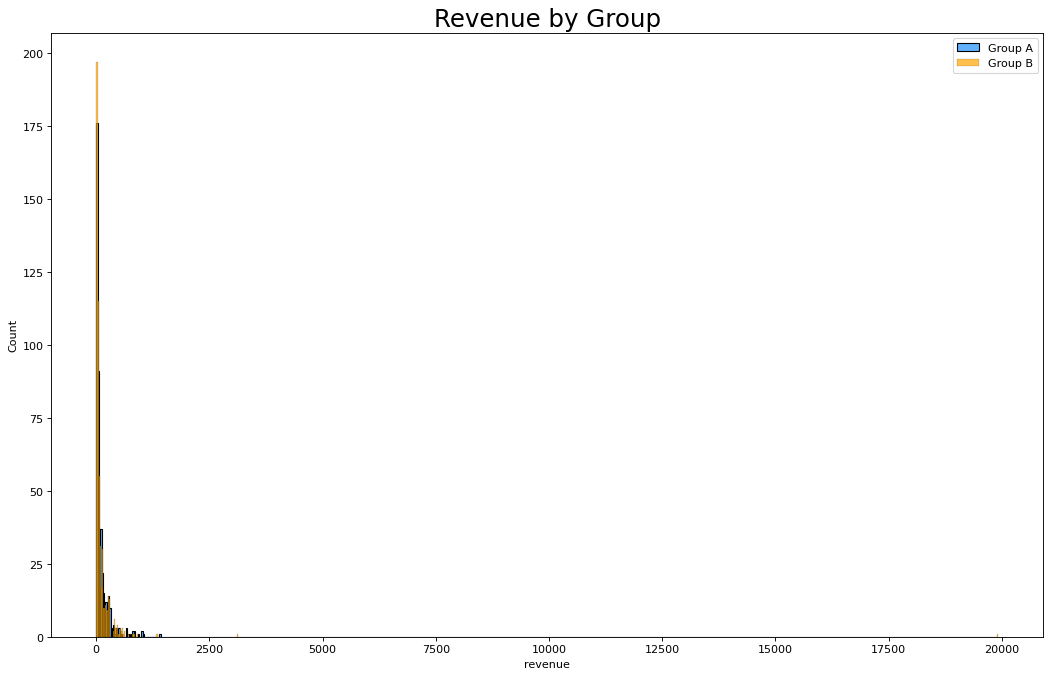

In [25]:
plt.figure(figsize=(16,10), dpi= 80)
sns.histplot(orders_data.loc[orders_data['group'] == 'A', "revenue"],  color="dodgerblue", label="Group A", alpha=.7)
sns.histplot(orders_data.loc[orders_data['group'] == 'B', "revenue"],  color="orange", label="Group B", alpha=.7)

# Decoration
plt.title('Revenue by Group', fontsize=22)
plt.legend()
plt.show()

We see that there are some very large orders that prevent us from properly seeing the graph, while dropping the top 1% of the revenue.

In [26]:
#Checking what maximum revenue covers 99% of the orders.
np.percentile(orders_data['revenue'], [90,95,99])

array([280.8  , 414.275, 830.3  ])

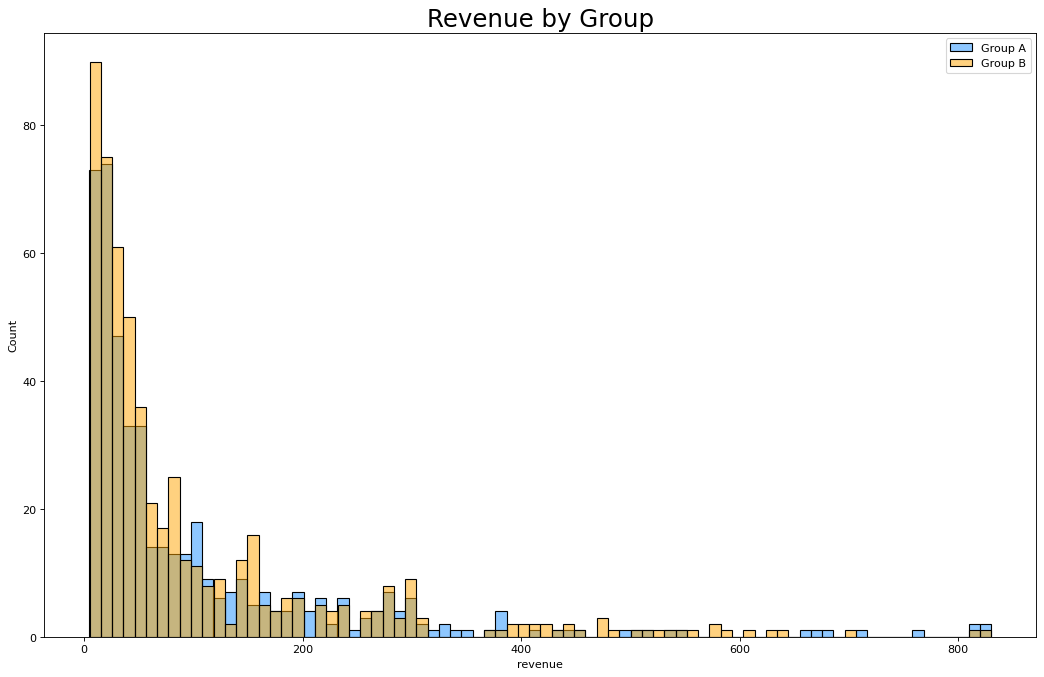

In [27]:
plt.figure(figsize=(16,10), dpi= 80)
sns.histplot(orders_data.query('revenue<901').loc[orders_data['group'] == 'A', "revenue"],  color="dodgerblue", label="Group A", alpha=.5,bins=80)
sns.histplot(orders_data.query('revenue<901').loc[orders_data['group'] == 'B', "revenue"],  color="orange", label="Group B", alpha=.5,bins=80)

# Decoration
plt.title('Revenue by Group', fontsize=22)
plt.legend()
plt.show()

The two groups look similar. It seems to me that there might be a slightily bigger revenue in group B but we will need a more indepth analysis to say for sure.

In [28]:
orders_data.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


### Cumulative Metrics

Let's make a new DataFrame with cumulative data.

In [29]:
# building an array with unique paired date-group values 
datesGroups = orders_data[['date','group']].drop_duplicates()

In [30]:
# getting aggregated cumulative daily data on orders 
ordersAggregated = datesGroups.apply(
    lambda x: orders_data[np.logical_and(orders_data['date'] <= x['date'],
                                         orders_data['group'] == x['group'])].
            agg({'date' : 'max',
                 'group' : 'max',
                 'transactionId' : pd.Series.nunique,
                 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}),
        axis=1).sort_values(by=['date','group']
       )
# getting aggregated cumulative daily data on visitors  
visitorsAggregated = datesGroups.apply(
    lambda x: visits_data[np.logical_and(visits_data['date'] <= x['date'],
                                         visits_data['group'] == x['group'])].
            agg({'date' : 'max', 
                 'group' : 'max', 
                 'visits' : 'sum'}),
    axis=1).sort_values(by=['date','group'])
# giving ordersAggregated more descriptive names for it's columns
ordersAggregated.rename(columns={'transactionId':'transactions', 'visitorId':'visitors'},inplace=True)
# merging the two tables into one
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [31]:
cumulativeData.head()

,date,group,transactions,visitors,revenue,visits
0,2019-08-01,A,23,19,2266.6,718
1,2019-08-01,B,17,17,967.2,709
2,2019-08-02,A,42,36,3734.9,1336
3,2019-08-02,B,40,39,3535.3,1289
4,2019-08-03,A,66,60,5550.1,1843


###    Graph cumulative revenue by group

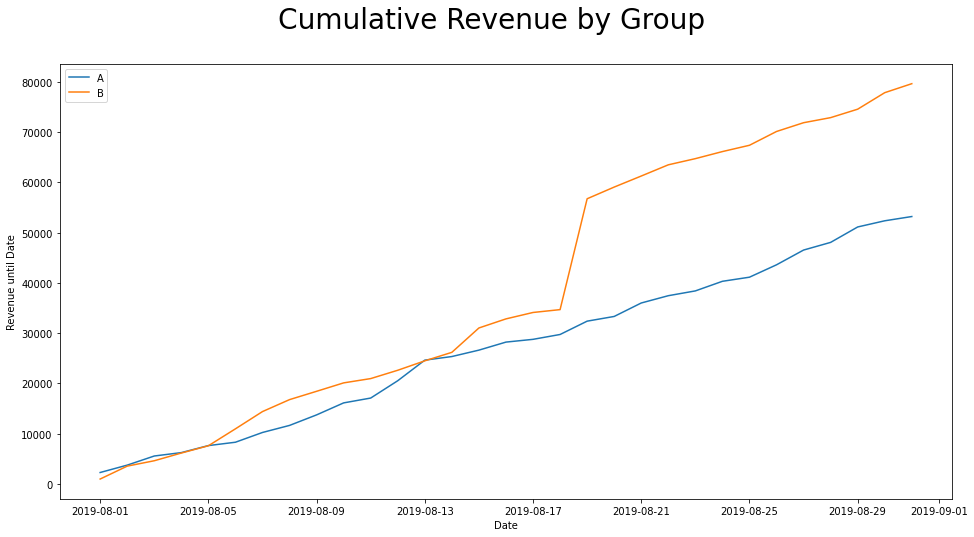

In [32]:
# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'transactions']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'transactions']]
plt.figure(figsize=(16,8))
plt.suptitle('Cumulative Revenue by Group',fontsize=28)
plt.xlabel('Date')
plt.ylabel('Revenue until Date')
# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend();

We can see that the two groups grow relatively in parallel, with the exception of 19 October when there is a big boost in the revenue of group B.<br>
With this boost, the group B is a clear winner. Without this boost that might be an outlier, the group B is slightly ahead but not in a conclusive way.

### Relative difference in cumulative revenue for group B compared with group A

Even more insight we can get from ploting the relative difference between the two groups' cumulative revenue.

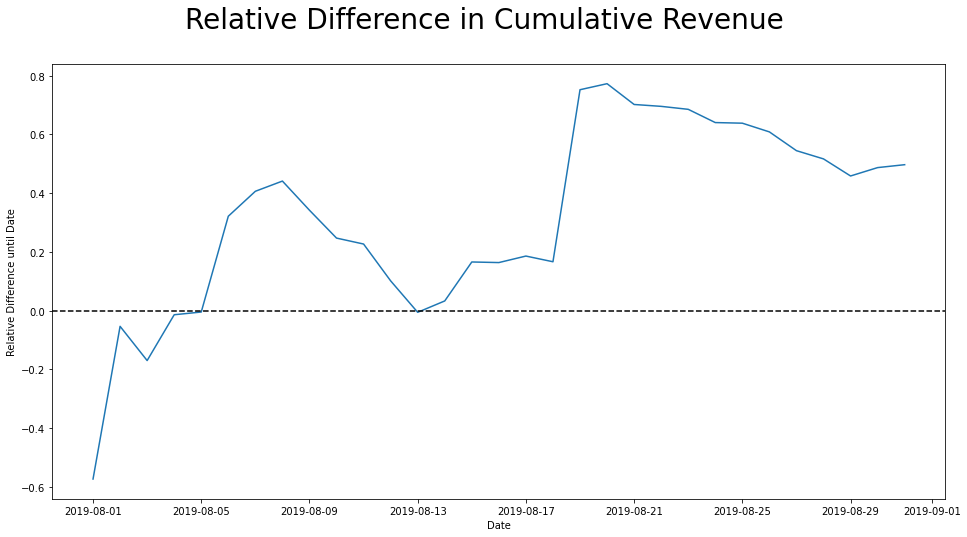

In [33]:
# gathering the data into one DataFrame
plt.figure(figsize=(16,8))
plt.suptitle('Relative Difference in Cumulative Revenue',fontsize=28)
plt.xlabel('Date')
plt.ylabel('Relative Difference until Date')
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plotting a relative difference graph for the average purchase sizes
plt.plot(mergedCumulativeRevenue['date'], 
         mergedCumulativeRevenue['revenueB']/(mergedCumulativeRevenue['revenueA'])-1)

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--')

This graph is even more positive for Group B. While it starts with a deficit compared to group A, it quickly grows over it and never falls behind A again, in spite of several decreases.

###    Graph cumulative average order size by group

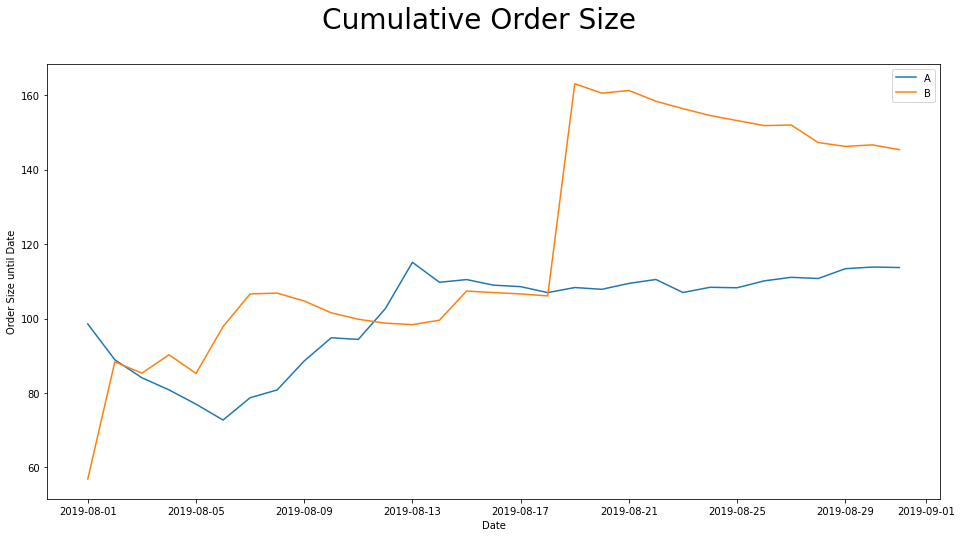

In [34]:
plt.figure(figsize=(16,8))
plt.suptitle('Cumulative Order Size',fontsize=28)
plt.xlabel('Date')
plt.ylabel('Order Size until Date')

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['transactions'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['transactions'], label='B')
plt.legend();

Analyzing the order size, we see big orders for Group B around 19 October. After that there is a decreasing slope in group B.
<br>
With these big orders, the group B is a clear winner. Without this orders that might be outliers, the group B would have end up beneath group A in cumulative order size comparison.

### Relative difference in cumulative average order size for group B compared with group A

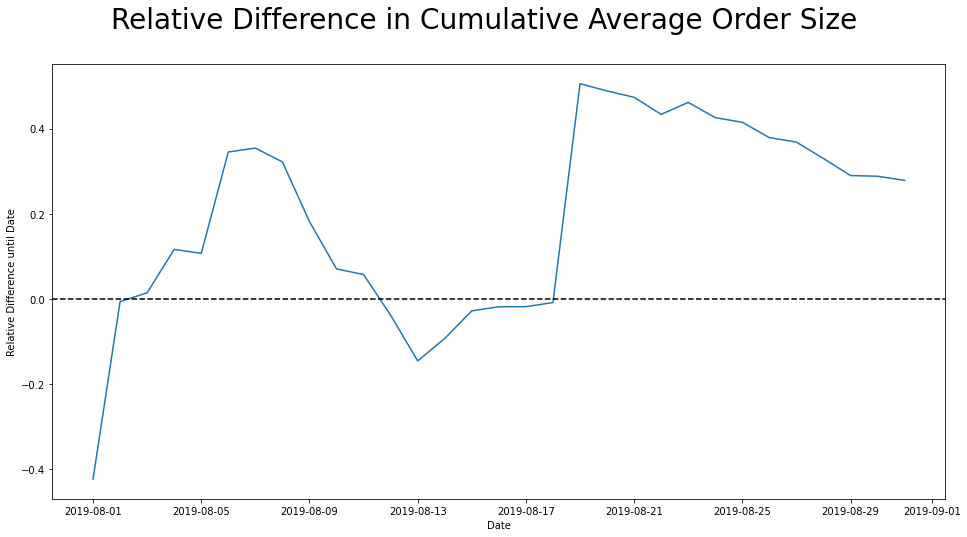

In [35]:
# gathering the data into one DataFrame
plt.figure(figsize=(16,8))
plt.suptitle('Relative Difference in Cumulative Average Order Size',fontsize=28)
plt.xlabel('Date')
plt.ylabel('Relative Difference until Date')

# plotting a relative difference graph for the average purchase sizes
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['transactionsB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['transactionsA'])-1)

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--')

We can see that while group B has more abrupt growth in average order size, in the majority of our timeline group A is gaining ground.

###    Conversion Rate for  Each Group
Until now we had better results from Group B but it's possible they happend because of unusual big orders. The Conversion Rate should give us a more sustainable indication of which group is better.

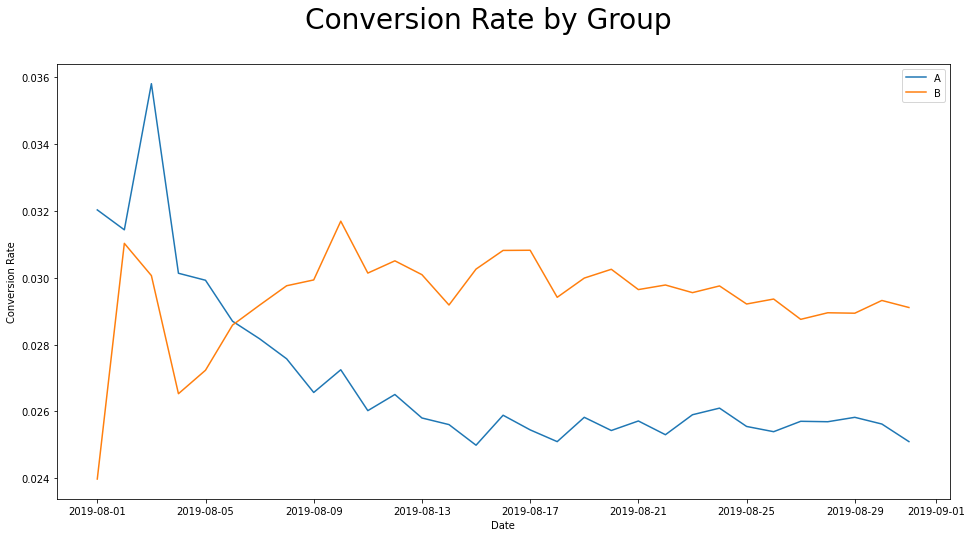

In [36]:
# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['transactions']/cumulativeData['visits']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# plotting the graphs
plt.figure(figsize=(16,8))
plt.suptitle('Conversion Rate by Group',fontsize=28)
plt.xlabel('Date')
plt.ylabel('Conversion Rate')

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend();

To our surprise, we see that group A is leading the whole time in the rate of visitors converted to clients. But the gap between the two groups is shrinking by the end.

###    Relative gain in conversion in B compared to A

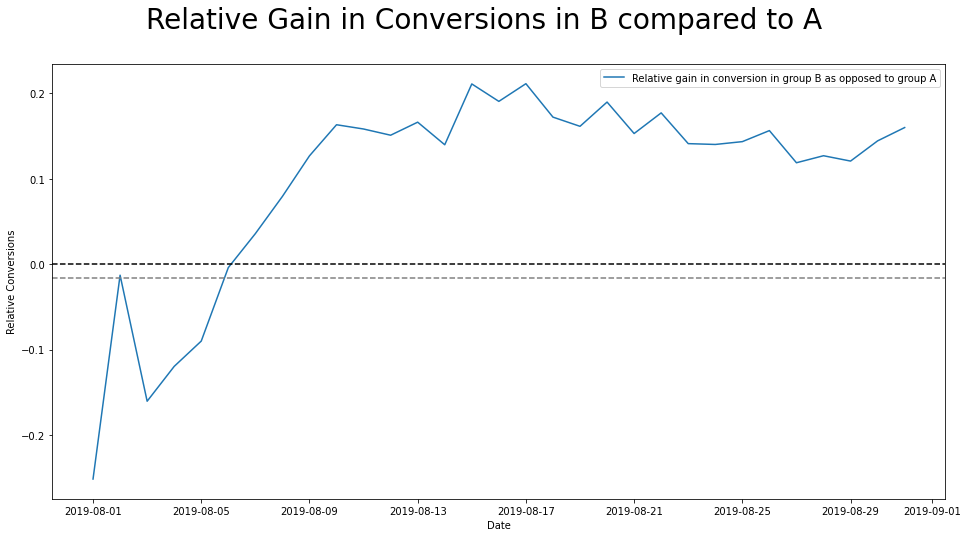

In [37]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(16,8))
plt.suptitle('Relative Gain in Conversions in B compared to A',fontsize=28)
plt.xlabel('Date')
plt.ylabel('Relative Conversions')

plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,
         label="Relative gain in conversion in group B as opposed to group A"
        )
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.016, color='grey', linestyle='--');

As we saw in the previous graph, Group a is leading in conversion rate, but by the end the difference is very small.

###    Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

In [38]:
ordersByUsers = (
    orders_data.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


There are users with 5, 8, 9, and 11 orders. That's a lot more than a regular user would place in a week. 
<br>
Let's plot a distribution histogram with the number of orders per user.

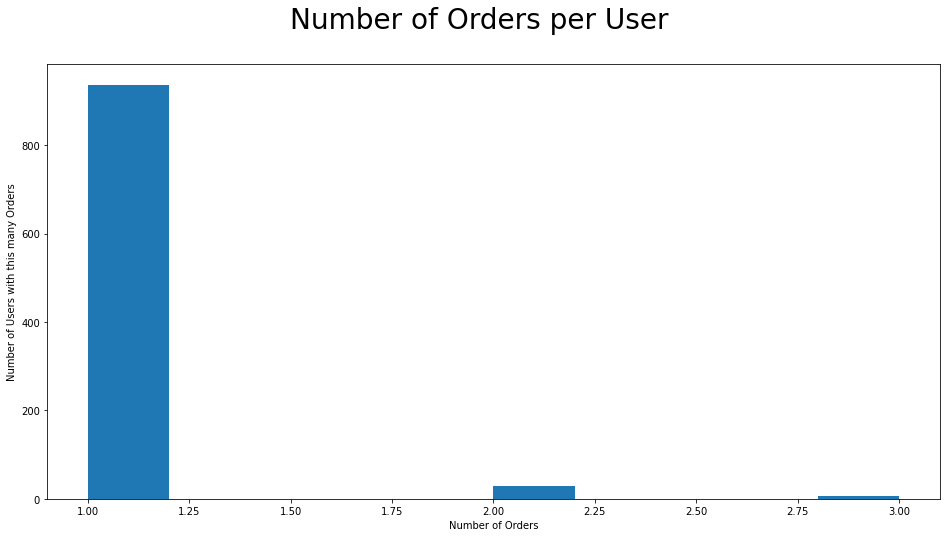

In [39]:
plt.figure(figsize=(16,8))
plt.suptitle('Number of Orders per User',fontsize=28)
plt.xlabel('Number of Orders')
plt.ylabel('Number of Users with this many Orders')

plt.hist(ordersByUsers['orders']);

The majority of customers placed only one order. However, a significant share placed two to six apiece.
<br>
Let's plot a scatter chart with the number of orders per user:

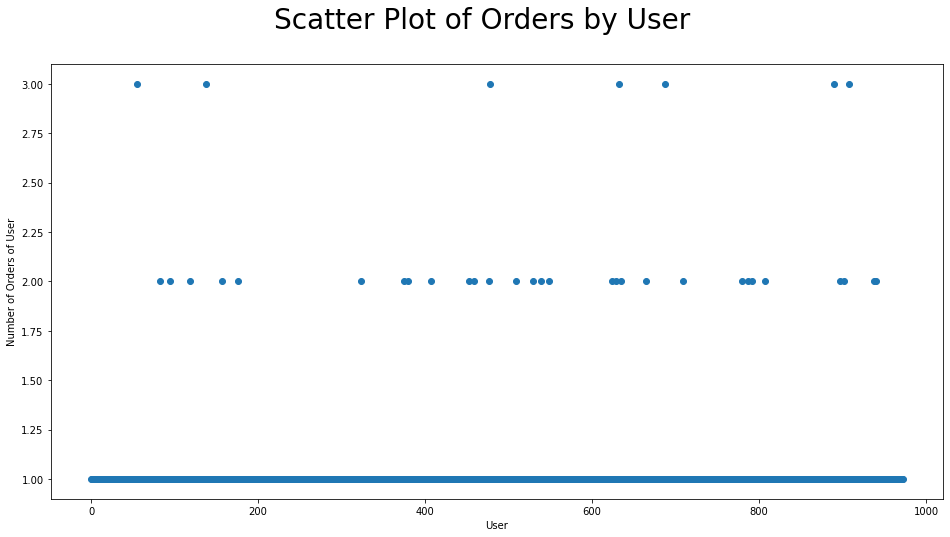

In [40]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(16,8))
plt.suptitle('Scatter Plot of Orders by User',fontsize=28)
plt.xlabel('User')
plt.ylabel('Number of Orders of User')
plt.scatter(x_values, ordersByUsers['orders']);

Our conclusions are confirmed: there are indeed a lot of users with two to four orders. The exact share remains unknown, since it's not clear whether we should consider them anomalies or not. 

###    Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [41]:
#Checking what case covers 99% of the users.
np.percentile(ordersByUsers['orders'], [90,91,95,99])

array([1., 1., 1., 2.])

We see that only a little more than 9% of users placed more than two orders or more, and less than 1% has more than 4 orders.<br>
Thus, it would be reasonable to set three orders per user as the upper limit for the number of orders and to filter anomalies on that basis. Letting anomalies in the data would distort the results and render the A/B test useless.

###    Plot a scatter chart of order prices. Make conclusions and conjectures.

Another type of anomaly we should be wary of is very expensive orders that would distort the results of the test.

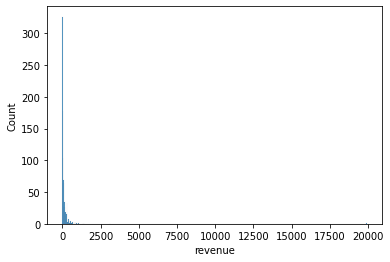

In [42]:
sns.histplot(orders_data['revenue']);

We see that indeed, while most of the orders are smaller than 1000, we have orders close to 20000.<br>
A scatter plot will help us see the anomalies more clearly.

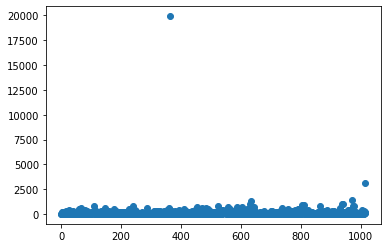

In [43]:
x_values = pd.Series(range(0, len(orders_data['revenue'])))
plt.scatter(x_values, orders_data['revenue']) 

We clearly see there are two outlier orders.

###    Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [44]:
#Checking what maximum revenue covers 99% of the orders.
np.percentile(orders_data['revenue'], [90,91,95,97,99])

array([280.8  , 288.68 , 414.275, 538.14 , 830.3  ])

We see that only a little more than 5% of users placed orders above 430, and less than 1% above 901.<br>
Thus, it would be reasonable to set 500 as the upper limit for the value of the orders and to filter anomalies on that basis. When doing A/B testing it's better to filter  anomalies in a stringent way so we can better see the overall picture.

###    Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

After visually comparing the two groups, let's see now what's the statistical significance of the difference between the groups. We'll start with Conversion Rate.

First we create tables with the clients who orderd at least once.

In [45]:
ordersByUsersA = orders_data[orders_data['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders_data[orders_data['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

We use sampleA and sampleB to be able to see the conversion rate.

In [46]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits_data[visits_data['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits_data[visits_data['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [47]:
print("P value for the H0 =  there isn't a statistically significant difference in conversion between the groups: {0:.3f}".
      format(st.mannwhitneyu(sampleA, sampleB)[1]))
print("Relative gain of group B {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

P value for the H0 =  there isn't a statistically significant difference in conversion between the groups: 0.011
Relative gain of group B 0.160


We see that $p=0.017<0.05$  so we reject the null hypothesis and we can say that there is a statistical difference in conversion between the groups and a $13.8\%$ gain to group $B$.

###    Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

In [48]:
print("P value for the H0 =  there isn't a statistically significant difference in order size between the groups: {0:.3f}".
      format(st.mannwhitneyu(orders_data[orders_data['group']=='A']['revenue'], 
                                orders_data[orders_data['group']=='B']['revenue'])[1]))
print("Relative gain of group B {0:.3f}".
      format(orders_data[orders_data['group']=='B']['revenue'].mean()/orders_data[orders_data['group']=='A']['revenue'].mean()-1)) 

P value for the H0 =  there isn't a statistically significant difference in order size between the groups: 0.862
Relative gain of group B 0.278


We see that $p=0.692>>0.05$  so no reason to reject the null hypothesis. There is no statistical difference in order size between the groups and a $13.8\%$.
There still is a $25.2\%$ gain to group $B$ but it's not statistically significant.

###    Extract the outliers from the data

Using the conclusions we derived in the begining of our analysis, we generate the group of outlier users.

In [49]:
orders_data

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


In [50]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 4]['userId']], axis = 0)
usersWithExpensiveOrders = orders_data[orders_data['revenue'] > 500]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
abnormalUsers.head(5)

1099    148427295
928     204675465
684     358944393
648     382846391
751     689129267
dtype: int64

In [51]:
abnormalUsers.shape

(37,)

We have 48 anomalous users in total. 

We can now prepare samples of the number of orders per user for each test group

In [52]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits_data[visits_data['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits_data[visits_data['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

###    Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

For both tests we want a confidence probabilty of 95%. Since we use a double sided test, we calculate the alpha level:
$$ \alpha = (1-0,95)/2\% = 0.25\% $$

We make the following null hypothesis:
<br>
$ H_{0} = $ there isn't a statistically significant difference in conversion between the groups
<br>
The alternative hypothesis is:
<br>
$ H_{1} = $ there is a statistically significant difference in conversion between the groups
<br>We choose the estimated standard error $\alpha = 0.0
25$ which should provide us with an adequate margin of confidence.


Let's try to find out how their actions affected the test results. We'll calculate the statistical significance of the differences in conversion between the groups, using filtered data. First we'll prepare samples of the number of orders per user for each test group:

In [53]:
alpha=0.025
pvalue=st.mannwhitneyu(sampleAFiltered, sampleBFiltered,
                            alternative="two-sided")[1]
print("P value for the H0 =  there isn't a statistically significant difference in conversion between the groups: {0:.3f}".
      format(pvalue))
if pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 
print("Relative gain of group B {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P value for the H0 =  there isn't a statistically significant difference in conversion between the groups: 0.010
We reject the null hypothesis
Relative gain of group B 0.167


Contrary to what I actually expected, we see that our certainty that there is a statistical difference in conversion rates increased, with $p=0.015<0.025$ so we reject the null hypothesis<br>Mean relative gain of group $B$ after filtration  is now $16.5\%$, a slight increase.

###    Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

We make the following null hypothesis:
<br>
$ H_{0} = $ there isn't a statistically significant difference in average order size between the groups
<br>
The alternative hypothesis is:
<br>
$ H_{1} = $ there is a statistically significant difference in average order size between the groups
<br>We again choose the estimated standard error $\alpha = 0.025$ which should provide us with an adequate margin of confidence for our double sided test.


In [54]:
orders_filtered=orders_data[np.logical_not(orders_data['visitorId'].isin(abnormalUsers))]

In [55]:
pvalue=st.mannwhitneyu(orders_data[np.logical_and(
        orders_data['group']=='A',
        np.logical_not(orders_data['visitorId'].isin(abnormalUsers)))]['revenue'],
        orders_data[np.logical_and(
            orders_data['group']=='B',
            np.logical_not(orders_data['visitorId'].isin(abnormalUsers)))]['revenue'],
                            alternative="two-sided")[1]
print("P value for the H0 =  there isn't a statistically significant difference in average order size: {0:.3f}".
      format(pvalue))
if pvalue < alpha:
    print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 
print('Relative gain of group B: {0:.3f}'.format(
    orders_data[np.logical_and(orders_data['group']=='B',np.logical_not(orders_data['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders_data[np.logical_and(
        orders_data['group']=='A',
        np.logical_not(orders_data['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

P value for the H0 =  there isn't a statistically significant difference in average order size: 0.992
We can't reject the null hypothesis
Relative gain of group B: -0.006


With the filtered data, the results in this test are even clearer than before. There is no reason to think there is statistical relevant difference between the two groups in order size, and the mean diffence is almost 0.

###    Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.

We saw there is a statistical signifcant difference in rate of conversion in favor of group B, but this does not translate into bigger orders, just more numerous.

If our goal was to increase the rate of conversion, A/B testing show that the B hypothesis gives better results.
If the goal was to increase order size, our hypothesis fails.

In both cases, I think we can stop the testing as the picture the results give is pretty clear.